In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [1]:
import pandas as  pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

2023-07-02 12:08:07.105947: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-02 12:08:07.138075: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-02 12:08:07.138794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 12:08:07.750290: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 15.0 MB/s eta 0:00:00


In [5]:
import PIL
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
from __future__ import absolute_import, division, print_function

In [7]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history

In [8]:
def plot_history2(history):
  plt.plot(history.history['mae'])
  plt.plot(history.history['mse'])
  plt.plot(history.history['mape'])
  plt.xlabel("Epochs")
  plt.ylabel('Loss')
  plt.legend(['mae', 'mape', 'mse'])
  plt.show()
# Plot the history

## Loading Datasets

In [9]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Flight.csv")

In [10]:
train.shape

(97023, 9)

In [11]:
train = train.drop(['Unnamed: 0'], axis = 1)

## Data Preprocessing

In [12]:
train.head()

,fare_amount,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,4.9,2,1.055053,2012,7,30,0,16
1,6.9,1,2.715959,2011,2,22,1,13
2,14.1,1,5.101370,2010,10,7,3,21
3,12.1,5,4.800593,2009,10,2,4,22
4,21.3,1,7.088301,2009,10,7,2,8


Check for null values

In [13]:
train.isnull().sum()

fare_amount        0
passenger_count    0
H_Distance         0
Year               0
Month              0
Date               0
Day of Week        0
Hour               0
dtype: int64

Describing dataframe

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97023 entries, 0 to 97022
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      97023 non-null  float64
 1   passenger_count  97023 non-null  int64  
 2   H_Distance       97023 non-null  float64
 3   Year             97023 non-null  int64  
 4   Month            97023 non-null  int64  
 5   Date             97023 non-null  int64  
 6   Day of Week      97023 non-null  int64  
 7   Hour             97023 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 5.9 MB


In [15]:
train.describe()

,fare_amount,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
count,97023.000000,97023.000000,97023.000000,97023.000000,97023.000000,97023.000000,97023.000000,97023.000000
mean,11.162088,1.688084,3.296804,2011.738876,6.268751,15.684652,3.029931,13.519001
std,9.121696,1.306013,3.520169,1.865130,3.435961,8.690549,1.949860,6.509714
min,2.500000,1.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,1.000000,1.261556,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,1.000000,2.151434,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,2.000000,3.918542,2013.000000,9.000000,23.000000,5.000000,19.000000
max,160.000000,6.000000,39.516128,2015.000000,12.000000,31.000000,6.000000,23.000000


droppin the rows with Haversine distance eqauls zero

In [16]:
train = train[train['H_Distance'] != 0]

In [17]:
train.describe()

,fare_amount,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
count,96099.000000,96099.000000,96099.000000,96099.000000,96099.000000,96099.000000,96099.000000,96099.000000
mean,11.193861,1.687957,3.328503,2011.743129,6.268556,15.683795,3.029969,13.515822
std,9.143699,1.305807,3.522105,1.866377,3.436559,8.690212,1.950510,6.511627
min,2.500000,1.000000,0.000084,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,1.000000,1.282180,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,1.000000,2.173121,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,2.000000,3.945338,2013.000000,9.000000,23.000000,5.000000,19.000000
max,160.000000,6.000000,39.516128,2015.000000,12.000000,31.000000,6.000000,23.000000


Splitting the into train and test set

In [18]:
y_train = train['fare_amount']
x_train = train.drop(['fare_amount'], axis = 1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=99)

In [20]:
x_train

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
84491,2,0.874832,2013,1,29,1,21
37693,1,1.941140,2012,12,5,2,8
72495,1,3.037259,2014,12,5,4,0
67371,1,4.894181,2012,9,17,0,17
47454,1,20.683306,2013,5,5,6,17
...,...,...,...,...,...,...,...
57589,1,1.414564,2013,7,16,1,16
36361,2,1.411577,2014,1,31,4,17
46715,1,3.447727,2009,10,30,4,0
23809,1,1.896915,2012,12,7,4,8


In [21]:
y_train

84491     6.00
37693     7.50
72495    22.00
67371    12.00
47454    57.33
         ...  
57589    10.50
36361     6.50
46715    10.90
23809     8.50
29595     4.90
Name: fare_amount, Length: 76879, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [23]:
trainx_scaled = scaler.transform(x_train)
testx_scaled = scaler.transform(x_test)

In [24]:
trainx_scaled.shape, testx_scaled.shape

((76879, 7), (19220, 7))

In [25]:
x_train_scaled = pd.DataFrame(trainx_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(testx_scaled, columns = x_test.columns)

## Creating different ANN models

A. Creating a baseline Neural network with the following specifications.
2 hidden layers, each with 16 and 8 neurons respectively. Sigmoid activation, Batch Size=128 for Gradient Descent.

In [ ]:
hidden_units1 = 16
hidden_units2 = 8

learning_rate = 0.001

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='glorot_uniform', activation='sigmoid'),
    Dense(hidden_units2, kernel_initializer='glorot_uniform', activation='sigmoid'),
    Dense(1, kernel_initializer='glorot_uniform', activation='linear')
  ])
  return model

# build the model
model = build_model_using_sequential()

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=['mse','mae','mape'],
    optimizer=SGD(learning_rate=learning_rate),
    metrics=['mse','mae','mape']
  )

# train the model
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=30,
    batch_size=30,
    validation_split=0.2,
    verbose=2
)

Epoch 1/30
2051/2051 - 6s - loss: 52.4649 - mse: 52.4649 - mae: 3.9750 - mape: 38.7093 - val_loss: 23.8250 - val_mse: 23.8250 - val_mae: 2.6001 - val_mape: 23.7965 - 6s/epoch - 3ms/step
Epoch 2/30
2051/2051 - 3s - loss: 19.0123 - mse: 19.0123 - mae: 2.4658 - mape: 24.2255 - val_loss: 16.9066 - val_mse: 16.9066 - val_mae: 2.4552 - val_mape: 24.8072 - 3s/epoch - 2ms/step
Epoch 3/30
2051/2051 - 5s - loss: 15.4047 - mse: 15.4047 - mae: 2.3738 - mape: 24.6371 - val_loss: 15.0613 - val_mse: 15.0613 - val_mae: 2.3643 - val_mape: 24.1405 - 5s/epoch - 3ms/step
Epoch 4/30
2051/2051 - 7s - loss: 14.0812 - mse: 14.0812 - mae: 2.2915 - mape: 23.8590 - val_loss: 14.0298 - val_mse: 14.0298 - val_mae: 2.2989 - val_mape: 23.7144 - 7s/epoch - 4ms/step
Epoch 5/30
2051/2051 - 6s - loss: 13.2845 - mse: 13.2845 - mae: 2.2148 - mape: 22.7921 - val_loss: 13.3950 - val_mse: 13.3950 - val_mae: 2.2125 - val_mape: 22.2158 - 6s/epoch - 3ms/step
Epoch 6/30
2051/2051 - 8s - loss: 12.8066 - mse: 12.8066 - mae: 2.1648

In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'mape', 'val_loss', 'val_mse', 'val_mae', 'val_mape'])

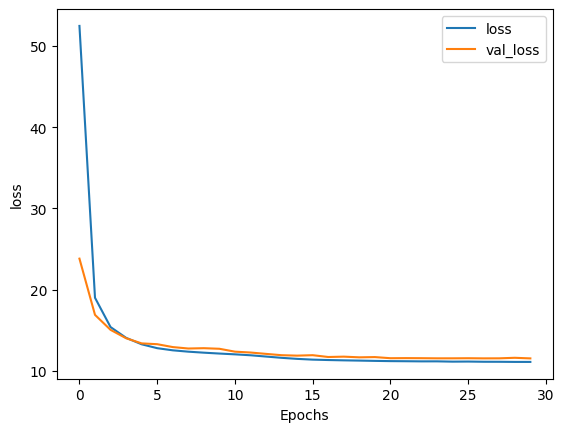

In [ ]:
plot_history(history, 'loss')

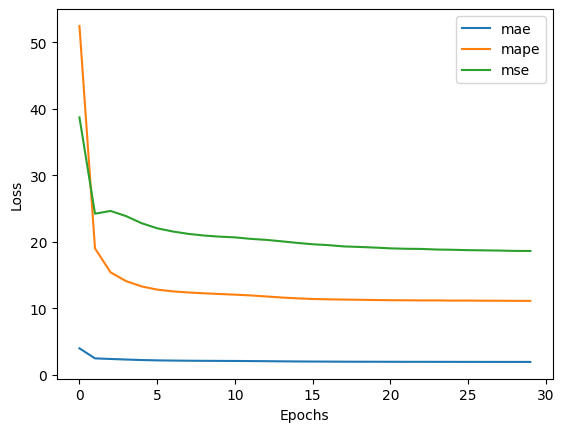

In [ ]:
plot_history2(history)

In [ ]:
y_pred = model.predict(x_test_scaled)

601/601 [==============================] - 1s 1ms/step


In [ ]:
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test,y_pred)

11.825315078649071

In [ ]:
df = pd.DataFrame()
df['Actual'] = y_test
df['Pred'] =  y_pred
df

,Actual,Pred
55008,4.1,5.260466
27242,16.1,12.744884
67064,3.5,5.154792
61647,6.5,6.491981
94673,34.0,25.080276
...,...,...
616,16.5,17.175287
82545,4.9,6.152103
26030,2.9,4.839193
19567,5.3,7.211738


B. Experiment with number of layers and neurons per layer to increase the performance metrics.

Too much no of nodes can lead to inaccurate models

Epoch 1/80
481/481 - 5s - loss: 95.8048 - mse: 95.8048 - mae: 6.0256 - mape: 57.7654 - val_loss: 83.6778 - val_mse: 83.6778 - val_mae: 5.7964 - val_mape: 62.4459 - 5s/epoch - 10ms/step
Epoch 2/80
481/481 - 2s - loss: 80.9896 - mse: 80.9896 - mae: 5.6926 - mape: 62.0875 - val_loss: 81.1874 - val_mse: 81.1874 - val_mae: 5.6979 - val_mape: 61.3674 - 2s/epoch - 3ms/step
Epoch 3/80
481/481 - 1s - loss: 74.6370 - mse: 74.6370 - mae: 5.3687 - mape: 57.8220 - val_loss: 67.5173 - val_mse: 67.5173 - val_mae: 4.9914 - val_mape: 52.3490 - 1s/epoch - 2ms/step
Epoch 4/80
481/481 - 1s - loss: 50.4412 - mse: 50.4412 - mae: 3.9841 - mape: 40.8864 - val_loss: 37.6484 - val_mse: 37.6484 - val_mae: 3.1824 - val_mape: 30.3785 - 1s/epoch - 2ms/step
Epoch 5/80
481/481 - 1s - loss: 30.7930 - mse: 30.7930 - mae: 2.8694 - mape: 27.5128 - val_loss: 27.3886 - val_mse: 27.3886 - val_mae: 2.7765 - val_mape: 26.1810 - 1s/epoch - 2ms/step
Epoch 6/80
481/481 - 1s - loss: 24.7256 - mse: 24.7256 - mae: 2.7045 - mape: 26

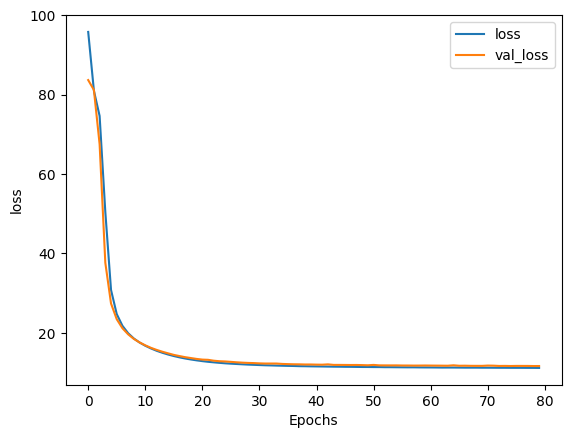

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 32
  hidden_units2 = 16
  hidden_units3 = 8
  learning_rate = 0.001
  batch_s = 128
  epp = 80

  model = Sequential([
    Dense(hidden_units1, activation='sigmoid'),
    Dense(hidden_units2, activation='sigmoid'),
    Dense(hidden_units3, activation='sigmoid'),
    Dense(1, activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=['mse','mae','mape'],
      optimizer=SGD(learning_rate=learning_rate),
      metrics=['mse','mae','mape']
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2,
      verbose=2
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'loss')

In [ ]:
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

601/601 [==============================] - 1s 1ms/step


11.994616610844508

In [ ]:
df = pd.DataFrame()
df['Actual'] = y_test
df['Pred'] =  pred
df

,Actual,Pred
55008,4.1,5.226966
27242,16.1,13.118277
67064,3.5,5.238496
61647,6.5,6.411579
94673,34.0,25.857157
...,...,...
616,16.5,17.352634
82545,4.9,6.017481
26030,2.9,4.906425
19567,5.3,6.946006


Epoch 1/10
481/481 - 2s - loss: 5.7112 - mean_squared_logarithmic_error: 5.7114 - val_loss: 5.7332 - val_mean_squared_logarithmic_error: 5.7292 - 2s/epoch - 3ms/step
Epoch 2/10
481/481 - 1s - loss: 5.7112 - mean_squared_logarithmic_error: 5.7107 - val_loss: 5.7332 - val_mean_squared_logarithmic_error: 5.7292 - 831ms/epoch - 2ms/step
Epoch 3/10
481/481 - 1s - loss: 5.7112 - mean_squared_logarithmic_error: 5.7115 - val_loss: 5.7332 - val_mean_squared_logarithmic_error: 5.7292 - 835ms/epoch - 2ms/step
Epoch 4/10
481/481 - 1s - loss: 5.7112 - mean_squared_logarithmic_error: 5.7111 - val_loss: 5.7332 - val_mean_squared_logarithmic_error: 5.7292 - 826ms/epoch - 2ms/step
Epoch 5/10
481/481 - 1s - loss: 5.7112 - mean_squared_logarithmic_error: 5.7107 - val_loss: 5.7332 - val_mean_squared_logarithmic_error: 5.7292 - 823ms/epoch - 2ms/step
Epoch 6/10
481/481 - 1s - loss: 5.7112 - mean_squared_logarithmic_error: 5.7118 - val_loss: 5.7332 - val_mean_squared_logarithmic_error: 5.7292 - 845ms/epoch 

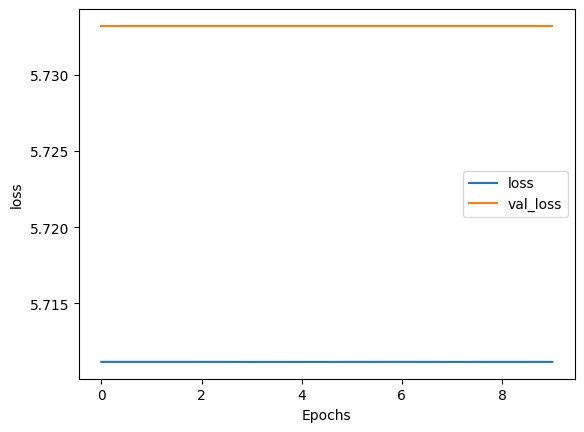

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 32
  hidden_units2 = 16
  hidden_units3 = 8
  learning_rate = 0.001
  batch_s = 128
  epp = 10

  model = Sequential([
    Dense(hidden_units1, activation='sigmoid'),
    Dense(hidden_units2, activation='sigmoid'),
    Dense(hidden_units3, activation='sigmoid'),
    Dense(1, activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=msle,
      optimizer=SGD(learning_rate=learning_rate),
      metrics=msle
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2,
      verbose=2
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'loss')

C. Experimenting with activation functions

MSLE takes a similar approach as MSE, but it utilizes a logarithm to off-set the large outliers in a data set and treats them as if they were on the same scale.

Epoch 1/25
481/481 [==============================] - 3s 5ms/step - loss: 0.0757 - mean_squared_logarithmic_error: 0.0757 - val_loss: 0.0508 - val_mean_squared_logarithmic_error: 0.0517
Epoch 2/25
481/481 [==============================] - 2s 4ms/step - loss: 0.0483 - mean_squared_logarithmic_error: 0.0483 - val_loss: 0.0499 - val_mean_squared_logarithmic_error: 0.0507
Epoch 3/25
481/481 [==============================] - 2s 4ms/step - loss: 0.0477 - mean_squared_logarithmic_error: 0.0477 - val_loss: 0.0493 - val_mean_squared_logarithmic_error: 0.0503
Epoch 4/25
481/481 [==============================] - 2s 4ms/step - loss: 0.0473 - mean_squared_logarithmic_error: 0.0473 - val_loss: 0.0487 - val_mean_squared_logarithmic_error: 0.0497
Epoch 5/25
481/481 [==============================] - 2s 4ms/step - loss: 0.0470 - mean_squared_logarithmic_error: 0.0470 - val_loss: 0.0488 - val_mean_squared_logarithmic_error: 0.0497
Epoch 6/25
481/481 [==============================] - 2s 4ms/step - lo

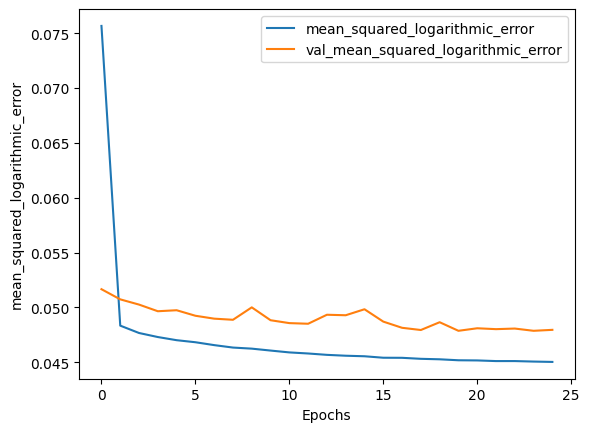

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 150
  hidden_units2 = 120
  hidden_units3 = 130
  learning_rate = 0.25
  batch_s = 128
  epp = 25

  model = Sequential([
    Dense(hidden_units1, activation='relu'),
    Dense(hidden_units2, activation='relu'),
    Dense(hidden_units3, activation='relu'),
    Dense(1, activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=msle,
      optimizer=SGD(learning_rate=learning_rate),
      metrics=[msle]
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'mean_squared_logarithmic_error')

In [ ]:
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

601/601 [==============================] - 1s 2ms/step


11.182781307934107

In [ ]:
df = pd.DataFrame()
df['Actual'] = y_test
df['Pred'] =  pred
df

,Actual,Pred
55008,4.1,4.522741
27242,16.1,12.924002
67064,3.5,4.490221
61647,6.5,6.983373
94673,34.0,25.353395
...,...,...
616,16.5,17.267359
82545,4.9,6.109830
26030,2.9,4.694713
19567,5.3,7.716340


with tanh

Epoch 1/100
481/481 [==============================] - 2s 4ms/step - loss: 0.6806 - mean_squared_logarithmic_error: 0.6801 - val_loss: 0.1623 - val_mean_squared_logarithmic_error: 0.1623
Epoch 2/100
481/481 [==============================] - 2s 3ms/step - loss: 0.1190 - mean_squared_logarithmic_error: 0.1190 - val_loss: 0.0920 - val_mean_squared_logarithmic_error: 0.0925
Epoch 3/100
481/481 [==============================] - 2s 5ms/step - loss: 0.0800 - mean_squared_logarithmic_error: 0.0800 - val_loss: 0.0769 - val_mean_squared_logarithmic_error: 0.0777
Epoch 4/100
481/481 [==============================] - 2s 5ms/step - loss: 0.0734 - mean_squared_logarithmic_error: 0.0734 - val_loss: 0.0741 - val_mean_squared_logarithmic_error: 0.0749
Epoch 5/100
481/481 [==============================] - 2s 3ms/step - loss: 0.0715 - mean_squared_logarithmic_error: 0.0714 - val_loss: 0.0725 - val_mean_squared_logarithmic_error: 0.0733
Epoch 6/100
481/481 [==============================] - 2s 4ms/ste

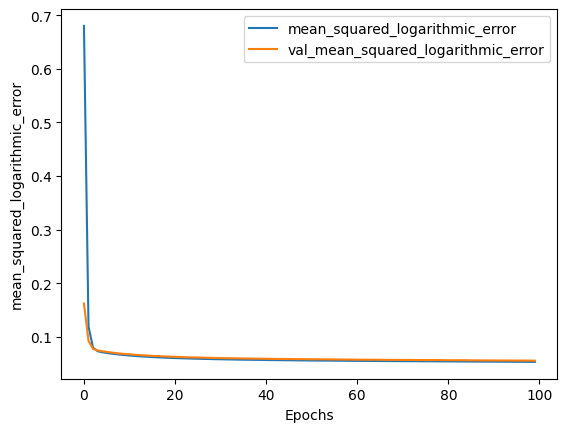

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 150
  hidden_units2 = 120
  hidden_units3 = 130
  learning_rate = 0.01
  batch_s = 128
  epp = 100

  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='tanh'),
    Dense(hidden_units2, kernel_initializer='normal', activation='tanh'),
    Dense(hidden_units3, kernel_initializer='normal', activation='tanh'),
    Dense(1, kernel_initializer='normal', activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=msle,
      optimizer=SGD(learning_rate=learning_rate),
      metrics=[msle]
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'mean_squared_logarithmic_error')

In [ ]:
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

601/601 [==============================] - 1s 1ms/step


19.786158952716157

In [ ]:
df = pd.DataFrame()
df['Actual'] = y_test
df['Pred'] =  pred
df

,Actual,Pred
55008,4.1,4.550578
27242,16.1,12.698973
67064,3.5,4.538756
61647,6.5,6.330300
94673,34.0,22.184750
...,...,...
616,16.5,17.453440
82545,4.9,6.264520
26030,2.9,4.119344
19567,5.3,7.042984


D. Experiment with regularization techniques: One of the most common problems data science professionals face is to avoid overfitting.

Dropout rate

Epoch 1/25
481/481 - 4s - loss: 0.0982 - mean_squared_logarithmic_error: 0.0981 - val_loss: 0.0534 - val_mean_squared_logarithmic_error: 0.0544 - 4s/epoch - 8ms/step
Epoch 2/25
481/481 - 2s - loss: 0.0618 - mean_squared_logarithmic_error: 0.0618 - val_loss: 0.0507 - val_mean_squared_logarithmic_error: 0.0517 - 2s/epoch - 5ms/step
Epoch 3/25
481/481 - 3s - loss: 0.0584 - mean_squared_logarithmic_error: 0.0584 - val_loss: 0.0502 - val_mean_squared_logarithmic_error: 0.0512 - 3s/epoch - 7ms/step
Epoch 4/25
481/481 - 3s - loss: 0.0564 - mean_squared_logarithmic_error: 0.0564 - val_loss: 0.0504 - val_mean_squared_logarithmic_error: 0.0515 - 3s/epoch - 6ms/step
Epoch 5/25
481/481 - 2s - loss: 0.0557 - mean_squared_logarithmic_error: 0.0557 - val_loss: 0.0496 - val_mean_squared_logarithmic_error: 0.0506 - 2s/epoch - 5ms/step
Epoch 6/25
481/481 - 2s - loss: 0.0548 - mean_squared_logarithmic_error: 0.0548 - val_loss: 0.0495 - val_mean_squared_logarithmic_error: 0.0505 - 2s/epoch - 5ms/step
Epoc

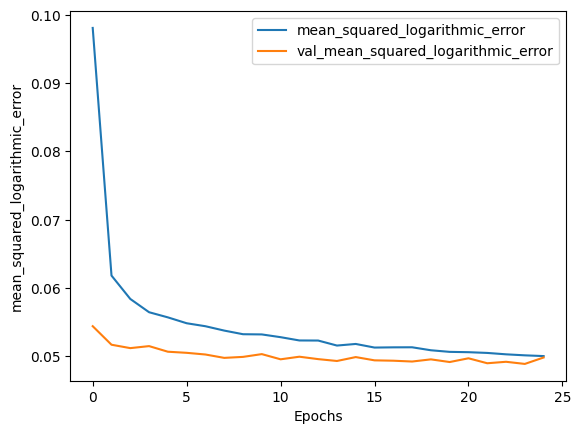

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 150
  hidden_units2 = 120
  hidden_units3 = 130
  learning_rate = 0.2
  batch_s = 128
  epp = 25

  model = Sequential([
    Dense(hidden_units1, activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=msle,
      optimizer=SGD(learning_rate=learning_rate),
      metrics=[msle]
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2,
      verbose=2
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'mean_squared_logarithmic_error')

In [ ]:
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

601/601 [==============================] - 1s 1ms/step


12.34976484622985

In [ ]:
df = pd.DataFrame()
df['Actual'] = y_test
df['Pred'] =  pred
df

,Actual,Pred
55008,4.1,4.461480
27242,16.1,12.097744
67064,3.5,4.499888
61647,6.5,6.583620
94673,34.0,22.855310
...,...,...
616,16.5,15.748741
82545,4.9,5.972372
26030,2.9,4.517616
19567,5.3,7.431433


Experiment with regularization techniques: Early stopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.00005,
    patience=3,
    verbose=2,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

with kernel initializer

Epoch 1/100
481/481 - 3s - loss: 0.0989 - mean_squared_logarithmic_error: 0.0988 - val_loss: 0.0506 - val_mean_squared_logarithmic_error: 0.0515 - 3s/epoch - 5ms/step
Epoch 2/100
481/481 - 2s - loss: 0.0484 - mean_squared_logarithmic_error: 0.0484 - val_loss: 0.0501 - val_mean_squared_logarithmic_error: 0.0510 - 2s/epoch - 4ms/step
Epoch 3/100
481/481 - 2s - loss: 0.0476 - mean_squared_logarithmic_error: 0.0477 - val_loss: 0.0503 - val_mean_squared_logarithmic_error: 0.0513 - 2s/epoch - 4ms/step
Epoch 4/100
481/481 - 2s - loss: 0.0473 - mean_squared_logarithmic_error: 0.0473 - val_loss: 0.0489 - val_mean_squared_logarithmic_error: 0.0499 - 2s/epoch - 5ms/step
Epoch 5/100
481/481 - 2s - loss: 0.0470 - mean_squared_logarithmic_error: 0.0470 - val_loss: 0.0486 - val_mean_squared_logarithmic_error: 0.0496 - 2s/epoch - 4ms/step
Epoch 6/100
481/481 - 2s - loss: 0.0468 - mean_squared_logarithmic_error: 0.0468 - val_loss: 0.0488 - val_mean_squared_logarithmic_error: 0.0497 - 2s/epoch - 3ms/ste

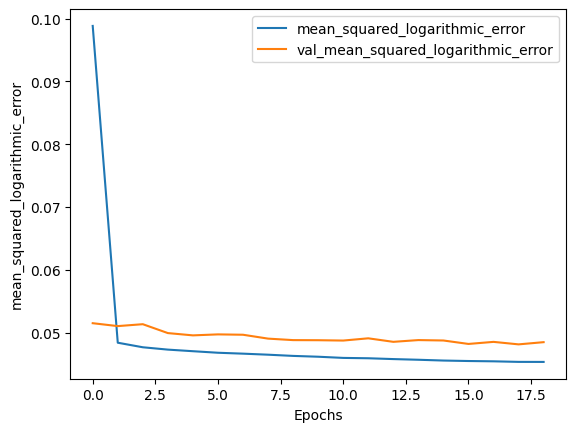

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 150
  hidden_units2 = 120
  hidden_units3 = 130
  learning_rate = 0.25
  batch_s = 128
  epp = 100

  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=msle,
      optimizer=SGD(learning_rate=learning_rate),
      metrics=[msle]
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2,
      callbacks=[callback],
      verbose=2
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'mean_squared_logarithmic_error')

In [ ]:
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

601/601 [==============================] - 1s 1ms/step


11.355265574740468

In [ ]:
df = pd.DataFrame()
df['Actual'] = y_test
df['Pred'] =  pred
df

,Actual,Pred
55008,4.1,4.583509
27242,16.1,12.610197
67064,3.5,4.416242
61647,6.5,6.711863
94673,34.0,24.388206
...,...,...
616,16.5,16.898901
82545,4.9,5.940190
26030,2.9,4.571243
19567,5.3,7.405447


Epoch 1/100
481/481 - 6s - loss: 0.1112 - mean_squared_logarithmic_error: 0.1111 - val_loss: 0.0512 - val_mean_squared_logarithmic_error: 0.0521 - 6s/epoch - 14ms/step
Epoch 2/100
481/481 - 5s - loss: 0.0524 - mean_squared_logarithmic_error: 0.0524 - val_loss: 0.0500 - val_mean_squared_logarithmic_error: 0.0509 - 5s/epoch - 10ms/step
Epoch 3/100
481/481 - 3s - loss: 0.0516 - mean_squared_logarithmic_error: 0.0515 - val_loss: 0.0493 - val_mean_squared_logarithmic_error: 0.0502 - 3s/epoch - 5ms/step
Epoch 4/100
481/481 - 3s - loss: 0.0509 - mean_squared_logarithmic_error: 0.0510 - val_loss: 0.0498 - val_mean_squared_logarithmic_error: 0.0507 - 3s/epoch - 6ms/step
Epoch 5/100
481/481 - 3s - loss: 0.0504 - mean_squared_logarithmic_error: 0.0504 - val_loss: 0.0498 - val_mean_squared_logarithmic_error: 0.0507 - 3s/epoch - 5ms/step
Epoch 6/100
481/481 - 3s - loss: 0.0502 - mean_squared_logarithmic_error: 0.0502 - val_loss: 0.0488 - val_mean_squared_logarithmic_error: 0.0498 - 3s/epoch - 6ms/s

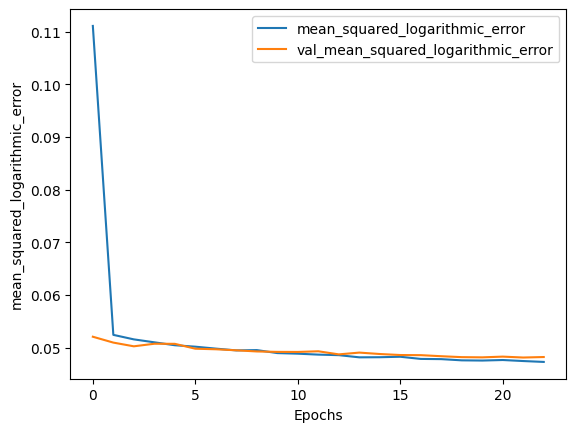

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 150
  hidden_units2 = 120
  hidden_units3 = 130
  learning_rate = 0.25
  batch_s = 128
  epp = 100

  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.1),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.1),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.1),
    Dense(1, kernel_initializer='normal', activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=msle,
      optimizer=SGD(learning_rate=learning_rate),
      metrics=[msle]
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2,
      callbacks=[callback],
      verbose=2
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'mean_squared_logarithmic_error')

In [ ]:
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

601/601 [==============================] - 1s 2ms/step


11.34634610999834

E. Experiment with at least 2 more Optimizers

Epoch 1/100
481/481 [==============================] - 5s 7ms/step - loss: 0.3183 - mean_squared_logarithmic_error: 0.3180 - val_loss: 0.0582 - val_mean_squared_logarithmic_error: 0.0591
Epoch 2/100
481/481 [==============================] - 3s 6ms/step - loss: 0.0598 - mean_squared_logarithmic_error: 0.0598 - val_loss: 0.0518 - val_mean_squared_logarithmic_error: 0.0527
Epoch 3/100
481/481 [==============================] - 3s 7ms/step - loss: 0.0566 - mean_squared_logarithmic_error: 0.0566 - val_loss: 0.0517 - val_mean_squared_logarithmic_error: 0.0525
Epoch 4/100
481/481 [==============================] - 2s 5ms/step - loss: 0.0557 - mean_squared_logarithmic_error: 0.0556 - val_loss: 0.0497 - val_mean_squared_logarithmic_error: 0.0506
Epoch 5/100
481/481 [==============================] - 4s 9ms/step - loss: 0.0549 - mean_squared_logarithmic_error: 0.0549 - val_loss: 0.0495 - val_mean_squared_logarithmic_error: 0.0503
Epoch 6/100
481/481 [==============================] - 4s 8ms/ste

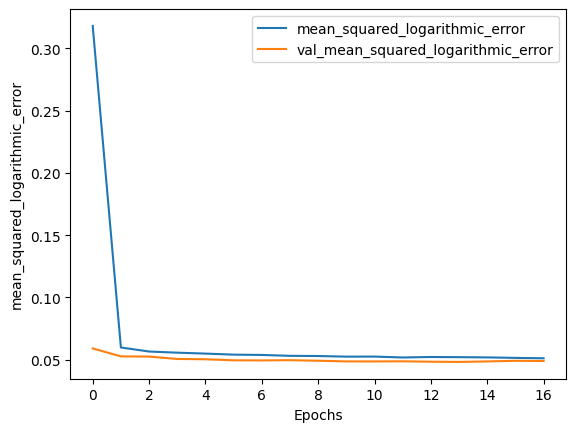

601/601 [==============================] - 1s 1ms/step


11.527756959482872

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 150
  hidden_units2 = 120
  hidden_units3 = 130
  learning_rate = 0.25
  batch_s = 128
  epp = 100

  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=msle,
      optimizer='adam',
      metrics=[msle]
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2,
      callbacks=[callback]
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'mean_squared_logarithmic_error')
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

Epoch 1/100
481/481 [==============================] - 5s 8ms/step - loss: 0.1054 - mean_squared_logarithmic_error: 0.1054 - val_loss: 0.0508 - val_mean_squared_logarithmic_error: 0.0517
Epoch 2/100
481/481 [==============================] - 2s 5ms/step - loss: 0.0555 - mean_squared_logarithmic_error: 0.0555 - val_loss: 0.0502 - val_mean_squared_logarithmic_error: 0.0512
Epoch 3/100
481/481 [==============================] - 2s 5ms/step - loss: 0.0539 - mean_squared_logarithmic_error: 0.0539 - val_loss: 0.0494 - val_mean_squared_logarithmic_error: 0.0504
Epoch 4/100
481/481 [==============================] - 2s 5ms/step - loss: 0.0532 - mean_squared_logarithmic_error: 0.0532 - val_loss: 0.0494 - val_mean_squared_logarithmic_error: 0.0504
Epoch 5/100
481/481 [==============================] - 2s 5ms/step - loss: 0.0527 - mean_squared_logarithmic_error: 0.0527 - val_loss: 0.0490 - val_mean_squared_logarithmic_error: 0.0499
Epoch 6/100
481/481 [==============================] - 3s 7ms/ste

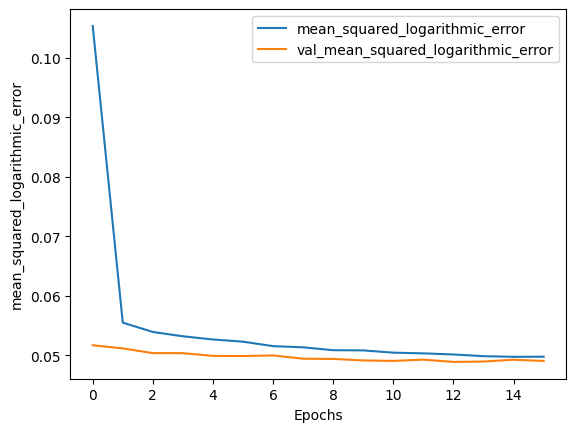

601/601 [==============================] - 1s 2ms/step


11.601443767512452

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 150
  hidden_units2 = 120
  hidden_units3 = 130
  learning_rate = 0.25
  batch_s = 128
  epp = 100

  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=msle,
      optimizer=tf.compat.v1.train.GradientDescentOptimizer(learning_rate, name = 'GradientDescent'),
      metrics=[msle]
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2,
      callbacks=[callback]
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'mean_squared_logarithmic_error')
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

Three metric

In [ ]:
adamax = tf.keras.optimizers.Adamax(learning_rate=0.001,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-07,
                                   name='Adamax')

Epoch 1/100
481/481 [==============================] - 4s 6ms/step - loss: 0.4024 - mean_squared_logarithmic_error: 0.4021 - val_loss: 0.0722 - val_mean_squared_logarithmic_error: 0.0729
Epoch 2/100
481/481 [==============================] - 4s 9ms/step - loss: 0.0715 - mean_squared_logarithmic_error: 0.0715 - val_loss: 0.0589 - val_mean_squared_logarithmic_error: 0.0597
Epoch 3/100
481/481 [==============================] - 3s 5ms/step - loss: 0.0619 - mean_squared_logarithmic_error: 0.0618 - val_loss: 0.0531 - val_mean_squared_logarithmic_error: 0.0540
Epoch 4/100
481/481 [==============================] - 3s 5ms/step - loss: 0.0582 - mean_squared_logarithmic_error: 0.0582 - val_loss: 0.0511 - val_mean_squared_logarithmic_error: 0.0520
Epoch 5/100
481/481 [==============================] - 3s 5ms/step - loss: 0.0564 - mean_squared_logarithmic_error: 0.0564 - val_loss: 0.0504 - val_mean_squared_logarithmic_error: 0.0514
Epoch 6/100
481/481 [==============================] - 3s 6ms/ste

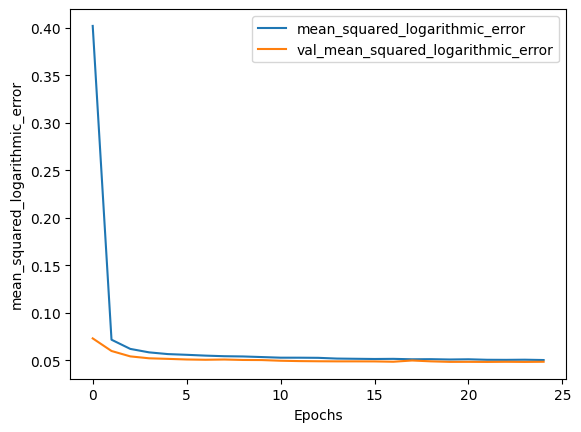

601/601 [==============================] - 1s 2ms/step


11.141036967316849

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 150
  hidden_units2 = 120
  hidden_units3 = 130
  learning_rate = 0.25
  batch_s = 128
  epp = 100

  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss=msle,
      optimizer=adamax,
      metrics=[msle]
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2,
      callbacks=[callback]
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'mean_squared_logarithmic_error')
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.00005,
    patience=3,
    verbose=2,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
adamax = tf.keras.optimizers.Adamax(learning_rate=0.001,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-07,
                                   name='Adamax')

Epoch 1/100
481/481 [==============================] - 4s 6ms/step - loss: 38.0248 - mse: 38.0248 - val_loss: 13.4356 - val_mse: 13.4356
Epoch 2/100
481/481 [==============================] - 2s 5ms/step - loss: 14.1536 - mse: 14.1536 - val_loss: 12.7394 - val_mse: 12.7394
Epoch 3/100
481/481 [==============================] - 3s 5ms/step - loss: 13.6179 - mse: 13.6179 - val_loss: 12.1479 - val_mse: 12.1479
Epoch 4/100
481/481 [==============================] - 4s 7ms/step - loss: 13.1940 - mse: 13.1940 - val_loss: 11.9749 - val_mse: 11.9749
Epoch 5/100
481/481 [==============================] - 3s 7ms/step - loss: 13.1444 - mse: 13.1444 - val_loss: 11.9034 - val_mse: 11.9034
Epoch 6/100
481/481 [==============================] - 3s 5ms/step - loss: 12.9705 - mse: 12.9705 - val_loss: 11.9235 - val_mse: 11.9235
Epoch 7/100
481/481 [==============================] - 4s 8ms/step - loss: 12.9391 - mse: 12.9391 - val_loss: 11.7682 - val_mse: 11.7682
Epoch 8/100
481/481 [====================

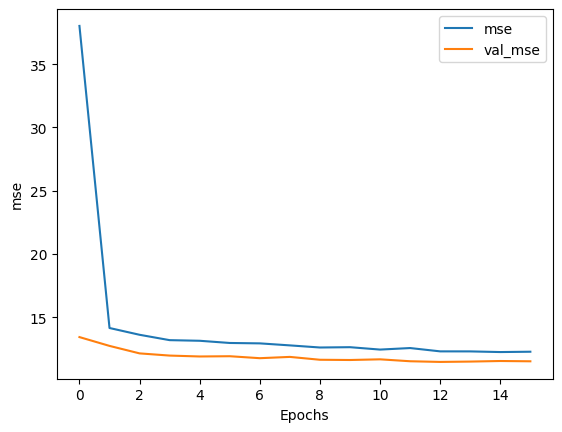

601/601 [==============================] - 1s 2ms/step


11.054399597115658

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  hidden_units1 = 150
  hidden_units2 = 120
  hidden_units3 = 130
  learning_rate = 0.25
  batch_s = 128
  epp = 100

  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='linear')])

  # loss function
  msle = MeanSquaredLogarithmicError()
  model.compile(
      loss='mse',
      optimizer=adamax,
      metrics='mse'
  )

  # train the model
  history = model.fit(
      x_train_scaled.values,
      y_train.values,
      epochs=epp,
      batch_size=batch_s,
      validation_split=0.2,
      callbacks=[callback]
  )

  return model,history

# build the model
model,history2 = build_model_using_sequential()
plot_history(history2, 'mse')
pred = model.predict(x_test_scaled)
mean_squared_error(y_test,pred)

In [ ]:
df = pd.DataFrame()
df['Actual'] = y_test
df['Pred'] =  pred
df

,Actual,Pred
55008,4.1,5.173818
27242,16.1,13.834305
67064,3.5,4.832965
61647,6.5,6.740461
94673,34.0,24.776331
...,...,...
616,16.5,18.250826
82545,4.9,6.067543
26030,2.9,5.374355
19567,5.3,7.659649


In [ ]:
mse = mean_squared_error(y_test,pred) * 0.01
mae = mean_absolute_error(y_test,pred) * 0.01
mse, mae

(0.11054399597115659, 0.019156867126639502)

In [ ]:
pred.shape[0]

19220

In [ ]:
# binomial confidence interval
from math import sqrt

# We can calculate the 95% confidence interval (z = 1.96) as follows:
interval = 1.96 * sqrt( (mae * (1 - mae)) / pred.shape[0])
print('%.3f' % interval)

0.002


In [ ]:
df = df.assign(Diff = lambda x: (x['Pred']-x['Actual']))

<Axes: xlabel='Diff', ylabel='Count'>

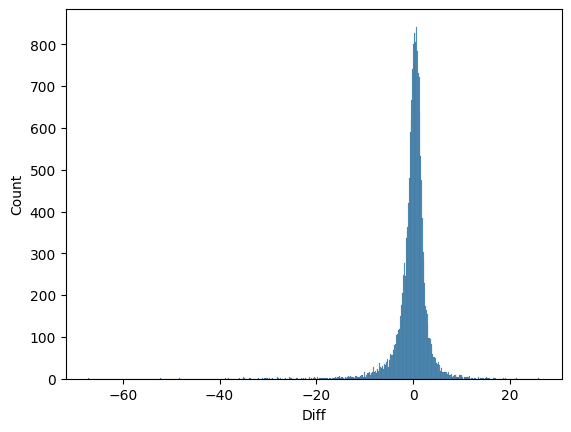

In [ ]:
sns.histplot(df['Diff'])

In [ ]:
model.save('Flight.h5')

In [27]:
import pickle

pickle_out = open("scaler.pkl", "wb")  # wb = WRITE BYTE
pickle.dump(scaler, pickle_out)
pickle_out.close()

In [28]:
pickle_in = open("scaler.pkl", "rb")  ## rb = READ BYTE
scaler = pickle.load(pickle_in)

In [ ]:
x = keras.models.load_model("Flight.h5")

In [ ]:
np.array(x_test_scaled.values[0])

array([-0.52606667, -0.72919248, -0.93550993, -1.23734462,  0.84228579,
       -1.0430273 , -0.07806942])

In [ ]:
x.predict(np.array( [x_test_scaled.values[0],] ) )

1/1 [==============================] - 0s 376ms/step


array([[5.173817]], dtype=float32)